Preprocessing data from Stack Overflow's 2021 Annual Developer Survey

In [1360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1361]:
df = pd.read_csv('/Users/jebranirshad/Downloads/stack-overflow-developer-survey-2021/survey_results_public.csv')

In [1362]:
df.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [1363]:
#Rename 'ConvertedCompYearly' to Salary
df = df.rename({'ConvertedCompYearly':'Salary'}, axis = 1)
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,Salary
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [1364]:
#Since Salary is our target variable, we remove rows where Salary is null(NaN)
df = df[df['Salary'].notnull()]
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,Salary
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
9,10,I am a developer by profession,Employed full-time,Sweden,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,School,7,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,51552.0
11,12,I am a developer by profession,Employed full-time,Spain,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",12,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent;Hispanic or Latin...,None of the above,None of the above,Too long,Easy,46482.0
12,13,I am a developer by profession,Employed full-time,Germany,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Other (please specify):,15,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Appropriate in length,Easy,77290.0
16,17,I am a developer by profession,Employed full-time,Turkey,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5 - 10 years,School,6,...,25-34 years old,Man,No,NaN,Middle Eastern,NaN,NaN,Appropriate in length,Neither easy nor difficult,17748.0


For our Salary Predictions we will use only the following columns: Employment, Country, EdLevel (Education Level), YearsCodePro (Years spent coding professionally), OrgSize (Organization size in terms of Number of Employees), Age, Gender, Ethnicity

In [1365]:
df = df[['Employment', 'Country', 'EdLevel', 'YearsCodePro', 'OrgSize', 'Age', 'Gender', 'Ethnicity', 'Salary']]
df

,Employment,Country,EdLevel,YearsCodePro,OrgSize,Age,Gender,Ethnicity,Salary
0,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",NaN,20 to 99 employees,25-34 years old,Man,White or of European descent,62268.0
9,Employed full-time,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,10 to 19 employees,25-34 years old,Man,White or of European descent,51552.0
11,Employed full-time,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,10 to 19 employees,25-34 years old,Man,White or of European descent;Hispanic or Latin...,46482.0
12,Employed full-time,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"1,000 to 4,999 employees",25-34 years old,Man,White or of European descent,77290.0
16,Employed full-time,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,100 to 499 employees,25-34 years old,Man,Middle Eastern,17748.0
...,...,...,...,...,...,...,...,...,...
83434,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,20 to 99 employees,25-34 years old,Man,White or of European descent,160500.0
83435,"Independent contractor, freelancer, or self-em...",Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Just me - I am a freelancer, sole proprietor, ...",18-24 years old,Man,Black or of African descent,3960.0
83436,Employed full-time,United States of America,"Secondary school (e.g. American high school, G...",4,"10,000 or more employees",25-34 years old,Man,White or of European descent,90000.0
83437,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,20 to 99 employees,25-34 years old,Man,White or of European descent,816816.0


In [1366]:
# We require the data of only Employed, full-time workers
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment', axis = 1)
df

,Country,EdLevel,YearsCodePro,OrgSize,Age,Gender,Ethnicity,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,10 to 19 employees,25-34 years old,Man,White or of European descent,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,10 to 19 employees,25-34 years old,Man,White or of European descent;Hispanic or Latin...,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"1,000 to 4,999 employees",25-34 years old,Man,White or of European descent,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,100 to 499 employees,25-34 years old,Man,Middle Eastern,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,500 to 999 employees,25-34 years old,Man,White or of European descent,46135.0
...,...,...,...,...,...,...,...,...
83432,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Less than 1 year,"10,000 or more employees",18-24 years old,Woman,East Asian,80169.0
83434,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,20 to 99 employees,25-34 years old,Man,White or of European descent,160500.0
83436,United States of America,"Secondary school (e.g. American high school, G...",4,"10,000 or more employees",25-34 years old,Man,White or of European descent,90000.0
83437,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,20 to 99 employees,25-34 years old,Man,White or of European descent,816816.0


In [1367]:
df.isnull().sum()

Country           0
EdLevel          19
YearsCodePro    399
OrgSize          41
Age              88
Gender          142
Ethnicity       768
Salary            0
dtype: int64

In [1368]:
# We will now do some preliminary cleaning.
# First look at the country data and extract only those countries where the developers are more than 400 while marking the rest as 'Others'.
df['Country'].value_counts()

United States of America                                9234
India                                                   3464
Germany                                                 2778
United Kingdom of Great Britain and Northern Ireland    2617
Canada                                                  1560
                                                        ... 
Guinea                                                     1
Dominica                                                   1
Saint Kitts and Nevis                                      1
Monaco                                                     1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [1369]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [1370]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10855
United States of America                                 9234
India                                                    3464
Germany                                                  2778
United Kingdom of Great Britain and Northern Ireland     2617
Canada                                                   1560
France                                                   1411
Brazil                                                   1351
Spain                                                     897
Netherlands                                               841
Australia                                                 827
Poland                                                    782
Italy                                                     771
Russian Federation                                        747
Sweden                                                    743
Turkey                                                    472
Switzerl

In [1371]:
#Since edlevel ha sonyl 19 missing values, we will use univariate imputation by utilizing the mode.
df['EdLevel'] = df['EdLevel'].fillna(df['EdLevel'].mode()[0])
df['EdLevel'].isnull().sum()

0

In [1372]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)
df['EdLevel'].value_counts()

Bachelor’s degree        20083
Master’s degree          10385
Less than a Bachelors     7981
Post grad                 2178
Name: EdLevel, dtype: int64

In [1373]:
# Now we will explore the YearsCodePro column.
df['YearsCodePro'].head(10)

9      4
11     5
12     6
16     2
17     6
23     2
24    18
26     5
27    21
29    16
Name: YearsCodePro, dtype: object

In [1374]:
df['YearsCodePro'].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '15', '3', '1', '12', '8', nan, '17', '14', '7', '26', '34', '11',
       '25', '24', '22', '13', '9', '20', '23', '39', '27', '35', '30',
       '19', '33', '28', '37', '43', '40', '29', '38', '31', '45', '42',
       '46', '32', '36', '47', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [1375]:
# We need to convert two of the entries 'Less than 1 year' and 'More than 50 years' into numeric data.
def clean_experience(column):
    if column == 'More than 50 years':
        return 50
    if column == 'Less than 1 year':
        return 0.5
    return float(column)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df['YearsCodePro'].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5, 15. ,  3. ,
        1. , 12. ,  8. ,  nan, 17. , 14. ,  7. , 26. , 34. , 11. , 25. ,
       24. , 22. , 13. ,  9. , 20. , 23. , 39. , 27. , 35. , 30. , 19. ,
       33. , 28. , 37. , 43. , 40. , 29. , 38. , 31. , 45. , 42. , 46. ,
       32. , 36. , 47. , 44. , 41. , 50. , 49. , 48. ])

In [1376]:
df['OrgSize'].unique()

array(['10 to 19 employees', '1,000 to 4,999 employees',
       '100 to 499 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', '2 to 9 employees',
       '20 to 99 employees', '10,000 or more employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       'I don’t know', nan], dtype=object)

In [1377]:
df['OrgSize'].value_counts()

20 to 99 employees                                    9140
100 to 499 employees                                  7959
10,000 or more employees                              5987
1,000 to 4,999 employees                              4862
10 to 19 employees                                    3695
2 to 9 employees                                      3401
500 to 999 employees                                  2907
5,000 to 9,999 employees                              1777
I don’t know                                           672
Just me - I am a freelancer, sole proprietor, etc.     186
Name: OrgSize, dtype: int64

In [1378]:
df['OrgSize'] = df['OrgSize'].replace(to_replace=['I don’t know', 'Just me - I am a freelancer, sole proprietor, etc.'], value='Other')
df['OrgSize'].unique()

array(['10 to 19 employees', '1,000 to 4,999 employees',
       '100 to 499 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', '2 to 9 employees',
       '20 to 99 employees', '10,000 or more employees', 'Other', nan],
      dtype=object)

In [1379]:
# Now, we will deal with the Age column
df['Age'].value_counts()

25-34 years old       20898
35-44 years old        9437
18-24 years old        6244
45-54 years old        2917
55-64 years old         863
65 years or older        91
Prefer not to say        50
Under 18 years old       39
Name: Age, dtype: int64

In [1380]:
# We will classify the values '65 Years or older', 'Prefer not to say' as 'Others' and remove 'Under 18 years old' given that it is not representative of real -world situations.
df.drop(df.index[df['Age'] == 'Under 18 years old'], inplace=True)
df['Age'] = df['Age'].replace(to_replace = ['65 years or older', 'Prefer not to say'], value = 'Other')

In [1381]:
df['Age'].unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '55-64 years old', 'Other', nan], dtype=object)

In [1382]:
df['Gender'].value_counts()

Man                                                                                   37466
Woman                                                                                  1869
Prefer not to say                                                                       385
Non-binary, genderqueer, or gender non-conforming                                       288
Man;Non-binary, genderqueer, or gender non-conforming                                   129
Or, in your own words:                                                                  107
Man;Or, in your own words:                                                               93
Woman;Non-binary, genderqueer, or gender non-conforming                                  70
Man;Woman                                                                                 9
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                  6
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [1383]:
# Given that 'Prefer not to say' is less than 2% of the data we will safely assume that it falls under Non-binary, genderqueer, or gender non-confirming. Furthermore, we will set the category 'Man;Woman' to 'Man' given that it is the most occurring category. We will set all the other categories to Non-binary, genderqueer, or gender non-confirming.
df['Gender'] = df['Gender'].replace(to_replace='Man;Woman', value = 'Man')
df['Gender'] = df['Gender'].replace(to_replace=['Prefer not to say', 'Man;Non-binary, genderqueer, or gender non-conforming', 'Or, in your own words:', 'Man;Or, in your own words:', 'Woman;Non-binary, genderqueer, or gender non-conforming', 'Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Man;Woman;Non-binary, genderqueer, or gender non-conforming', 'Man;Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Woman;Or, in your own words:', 'Man;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:', 'Man;Woman;Or, in your own words:', 'Woman;Non-binary, genderqueer, or gender non-conforming;Or, in your own words:'], value = 'Non-binary, genderqueer, or gender non-conforming')
df['Gender'].value_counts()

Man                                                  37475
Woman                                                 1869
Non-binary, genderqueer, or gender non-conforming     1102
Name: Gender, dtype: int64

In [1384]:
#We will now deal with ethnicity
df['Ethnicity'].value_counts()

White or of European descent                                                                                    24398
South Asian                                                                                                      3294
Hispanic or Latino/a/x                                                                                           2110
Southeast Asian                                                                                                  1298
Middle Eastern                                                                                                   1207
                                                                                                                ...  
I don't know;Middle Eastern;Or, in your own words:                                                                  1
Multiracial;South Asian;Hispanic or Latino/a/x;Biracial                                                             1
I don't know;Hispanic or Latino/a/x;Biracial            

In [1385]:
# Filter the ethnicity column based on values that are above 200 and set the rest to 'Other'
ethnicity_map = shorten_categories(df.Ethnicity.value_counts(), 200)
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_map)
df.Ethnicity.value_counts()

White or of European descent                           24398
South Asian                                             3294
Hispanic or Latino/a/x                                  2110
Other                                                   1879
Southeast Asian                                         1298
Middle Eastern                                          1207
East Asian                                              1194
Prefer not to say                                        963
Or, in your own words:                                   778
Black or of African descent                              766
White or of European descent;Hispanic or Latino/a/x      732
I don't know                                             698
White or of European descent;Middle Eastern              295
Multiracial                                              208
Name: Ethnicity, dtype: int64

In [1386]:
# We will keep the categories that are above 200, and set a few more categories that do not convey much information to 'Other'
df['Ethnicity'] = df['Ethnicity'].replace(to_replace=['Prefer not to say', 'Or, in your own words:', 'White or of European descent;Hispanic or Latino/a/x', 'I don\'t know', 'White or of European descent;Middle Eastern', 'Multiracial'], value='Other')
df.Ethnicity.value_counts()

White or of European descent    24398
Other                            5553
South Asian                      3294
Hispanic or Latino/a/x           2110
Southeast Asian                  1298
Middle Eastern                   1207
East Asian                       1194
Black or of African descent       766
Name: Ethnicity, dtype: int64

In [1387]:
df.head()

,Country,EdLevel,YearsCodePro,OrgSize,Age,Gender,Ethnicity,Salary
9,Sweden,Master’s degree,4.0,10 to 19 employees,25-34 years old,Man,White or of European descent,51552.0
11,Spain,Bachelor’s degree,5.0,10 to 19 employees,25-34 years old,Man,Other,46482.0
12,Germany,Master’s degree,6.0,"1,000 to 4,999 employees",25-34 years old,Man,White or of European descent,77290.0
16,Turkey,Bachelor’s degree,2.0,100 to 499 employees,25-34 years old,Man,Middle Eastern,17748.0
17,Canada,Bachelor’s degree,6.0,500 to 999 employees,25-34 years old,Man,White or of European descent,46135.0


/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

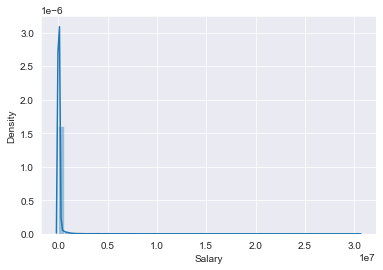

In [1388]:
# Before we continue, we must check for outliers in our salary data
sns.distplot(df['Salary'])

/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

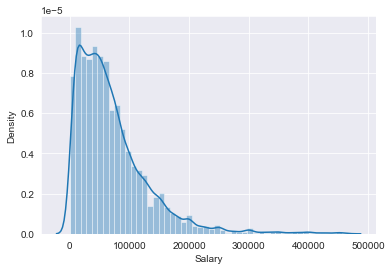

In [1389]:
# To deal with the outliers, we will remove the top 3% of data
q = df['Salary'].quantile(0.97)
df = df[df['Salary']<q]
sns.distplot(df['Salary'])

/var/folders/ml/4468d9mj28x8xpt9qg0_r0s00000gn/T/ipykernel_45324/1568063823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log Salary']  = log_salary
/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log Salary', ylabel='Density'>

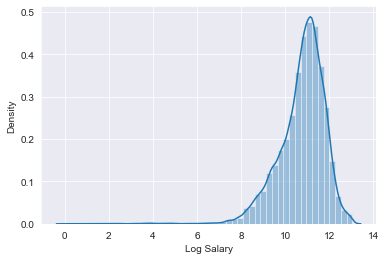

In [1390]:
#Since the salary is exponentially distributed, we will use log transformation for transformation
log_salary = np.log(df['Salary'])
df['Log Salary']  = log_salary
df = df.drop('Salary', axis = 1)
sns.distplot(df['Log Salary'])

/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsCodePro', ylabel='Density'>

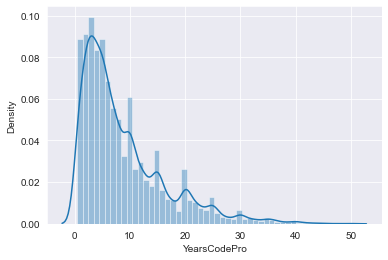

In [1391]:
# We will follow the same process for the YearsCodePro column
sns.distplot(df['YearsCodePro'])

/Users/jebranirshad/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log YearsCodePro', ylabel='Density'>

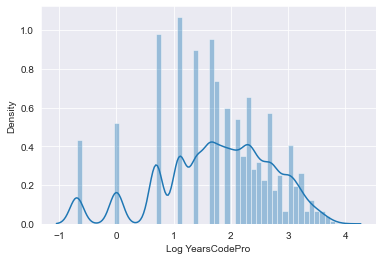

In [1392]:
log_yrs = np.log(df['YearsCodePro'])
df['Log YearsCodePro']  = log_yrs
df = df.drop('YearsCodePro', axis = 1)
sns.distplot(df['Log YearsCodePro'])

In [1393]:
df = df.reset_index(drop=True)

In [1394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39366 entries, 0 to 39365
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           39366 non-null  object 
 1   EdLevel           39366 non-null  object 
 2   OrgSize           39326 non-null  object 
 3   Age               39284 non-null  object 
 4   Gender            39231 non-null  object 
 5   Ethnicity         38620 non-null  object 
 6   Log Salary        39366 non-null  float64
 7   Log YearsCodePro  38981 non-null  float64
dtypes: float64(2), object(6)
memory usage: 2.4+ MB


In [1395]:
# Now we will convert the categorical values to numerical values
from sklearn.preprocessing import OrdinalEncoder

encoder_dict = {}
for col_name in df.iloc[:, 0:6]:
    encoder_dict[col_name] = OrdinalEncoder()

    col = df[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)

    encoded_vals = encoder_dict[col_name].fit_transform(reshaped_vals)
    df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [1396]:
df

,Country,EdLevel,OrgSize,Age,Gender,Ethnicity,Log Salary,Log YearsCodePro
0,14.0,2.0,1.0,1.0,0.0,7.0,10.850346,1.386294
1,13.0,0.0,1.0,1.0,0.0,4.0,10.746820,1.609438
2,4.0,2.0,0.0,1.0,0.0,7.0,11.255320,1.791759
3,16.0,0.0,3.0,1.0,0.0,3.0,9.784028,0.693147
4,2.0,0.0,7.0,1.0,0.0,7.0,10.739327,1.791759
...,...,...,...,...,...,...,...,...
39361,18.0,2.0,1.0,3.0,0.0,7.0,11.736069,3.044522
39362,2.0,0.0,2.0,0.0,2.0,1.0,11.291892,-0.693147
39363,18.0,0.0,5.0,1.0,0.0,7.0,11.986049,1.609438
39364,18.0,1.0,2.0,1.0,0.0,7.0,11.407565,1.386294


In [1397]:
# We will use KNN imputation for the null values and round the values
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df.iloc[:, 0:6] = np.round(imputer.fit_transform(df.iloc[:, 0:6]))

In [1398]:
df

,Country,EdLevel,OrgSize,Age,Gender,Ethnicity,Log Salary,Log YearsCodePro
0,14.0,2.0,1.0,1.0,0.0,7.0,10.850346,1.386294
1,13.0,0.0,1.0,1.0,0.0,4.0,10.746820,1.609438
2,4.0,2.0,0.0,1.0,0.0,7.0,11.255320,1.791759
3,16.0,0.0,3.0,1.0,0.0,3.0,9.784028,0.693147
4,2.0,0.0,7.0,1.0,0.0,7.0,10.739327,1.791759
...,...,...,...,...,...,...,...,...
39361,18.0,2.0,1.0,3.0,0.0,7.0,11.736069,3.044522
39362,2.0,0.0,2.0,0.0,2.0,1.0,11.291892,-0.693147
39363,18.0,0.0,5.0,1.0,0.0,7.0,11.986049,1.609438
39364,18.0,1.0,2.0,1.0,0.0,7.0,11.407565,1.386294


In [1399]:
df.isnull().sum()

Country               0
EdLevel               0
OrgSize               0
Age                   0
Gender                0
Ethnicity             0
Log Salary            0
Log YearsCodePro    385
dtype: int64

In [1400]:
df.iloc[:, -1:] = imputer.fit_transform(df.iloc[:, -1:])

In [1401]:
df

,Country,EdLevel,OrgSize,Age,Gender,Ethnicity,Log Salary,Log YearsCodePro
0,14.0,2.0,1.0,1.0,0.0,7.0,10.850346,1.386294
1,13.0,0.0,1.0,1.0,0.0,4.0,10.746820,1.609438
2,4.0,2.0,0.0,1.0,0.0,7.0,11.255320,1.791759
3,16.0,0.0,3.0,1.0,0.0,3.0,9.784028,0.693147
4,2.0,0.0,7.0,1.0,0.0,7.0,10.739327,1.791759
...,...,...,...,...,...,...,...,...
39361,18.0,2.0,1.0,3.0,0.0,7.0,11.736069,3.044522
39362,2.0,0.0,2.0,0.0,2.0,1.0,11.291892,-0.693147
39363,18.0,0.0,5.0,1.0,0.0,7.0,11.986049,1.609438
39364,18.0,1.0,2.0,1.0,0.0,7.0,11.407565,1.386294


In [1402]:
df.isnull().sum()

Country             0
EdLevel             0
OrgSize             0
Age                 0
Gender              0
Ethnicity           0
Log Salary          0
Log YearsCodePro    0
dtype: int64

In [1403]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df.head()

,Country,EdLevel,OrgSize,Age,Gender,Ethnicity,Log Salary,Log YearsCodePro
0,0.777778,0.666667,0.125,0.2,0.0,1.000000,0.831411,0.451545
1,0.722222,0.000000,0.125,0.2,0.0,0.571429,0.823479,0.500000
2,0.222222,0.666667,0.000,0.2,0.0,1.000000,0.862443,0.539591
3,0.888889,0.000000,0.375,0.2,0.0,0.428571,0.749704,0.301030
4,0.111111,0.000000,0.875,0.2,0.0,1.000000,0.822904,0.539591


<AxesSubplot:>

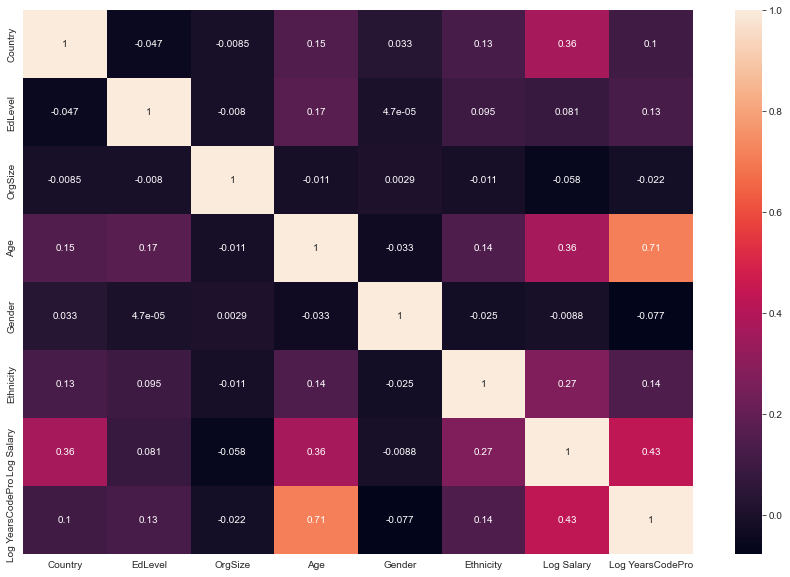

In [1432]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)

In [1419]:
# Now we will set our target
X = df.drop('Log Salary', axis = 1)
y = df['Log Salary']

In [1426]:
from sklearn.model_selection import cross_val_score, train_test_split
def predict(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv = 10)
    print("Cross validation is",np.mean(score)*100)

In [1427]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
predict(model, X, y)

Accuracy is 32.595553369409416
Cross validation is 31.692662749070948


In [1428]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
predict(model, X, y)

Accuracy is 21.035599756673797
Cross validation is 29.03373916254552


In [1429]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
predict(model, X, y)

Accuracy is 47.74392030487393
Cross validation is 48.79682217867119


In [1430]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [1431]:
regressor = gs.best_estimator_
predict(regressor, X, y)

Accuracy is 52.98413996813214
Cross validation is 53.34137793758069
